# Computing the cross-correlation of two data attributes.

Preparing data from globalLandTempHist file:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [2]:
#downloads file from given url
def download(url, fpath):
    import requests
    r = requests.get(url)
    with open(fpath, 'wb') as f:
        f.write(r.content)
    return None

#fetching data file
def fetchDatafromWeb(filePath,url):
    download(url,filePath)
    return filePath

In [3]:
url='https://www.cdslab.org/recipes/programming/stat-covmat/globalLandTempHist.txt'

In [4]:
fetchDatafromWeb(filePath="./globalLandTempHist.txt", url=url)

'./globalLandTempHist.txt'

In [5]:
df=pd.read_csv('./globalLandTempHist.txt', ", ")
df

<ipython-input-5-47d4f53eae7c>:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  df=pd.read_csv('./globalLandTempHist.txt', ", ")


,year,anomaly
0,1743.846154,-1.131
1,1743.923077,NaN
2,1744.076923,NaN
3,1744.153846,NaN
4,1744.230769,NaN
...,...,...
3234,2013.384615,0.813
3235,2013.461538,1.088
3236,2013.538462,0.671
3237,2013.615385,0.919


In [6]:
""" Droping rows with values NaN """
ndf=df.dropna()
ndf

,year,anomaly
0,1743.846154,-1.131
5,1744.307692,1.926
6,1744.384615,-1.115
7,1744.461538,-0.235
8,1744.538462,-0.430
...,...,...
3234,2013.384615,0.813
3235,2013.461538,1.088
3236,2013.538462,0.671
3237,2013.615385,0.919


Preparing data from annual-co2-emissions-per-country csv file:

In [7]:
url_2="https://www.cdslab.org/recipes/programming/stat-crosscorr/annual-co2-emissions-per-country.csv"

In [8]:
fetchDatafromWeb(filePath="./annual-co2-emissions-per-country.csv", url=url_2)

'./annual-co2-emissions-per-country.csv'

In [9]:
edf=pd.read_csv("./annual-co2-emissions-per-country.csv")
edf

,Entity,Code,Year,Annual CO2 emissions
0,Afghanistan,AFG,1949,14656
1,Afghanistan,AFG,1950,84272
2,Afghanistan,AFG,1951,91600
3,Afghanistan,AFG,1952,91600
4,Afghanistan,AFG,1953,106256
...,...,...,...,...
23398,Zimbabwe,ZWE,2015,12170460
23399,Zimbabwe,ZWE,2016,10814761
23400,Zimbabwe,ZWE,2017,10246841
23401,Zimbabwe,ZWE,2018,11340575


1. Make a visualization of the global carbon emission data in the CSV file in the above by summing over the contributions of all countries per year.

In [10]:
sumdf =edf.groupby('Year')['Annual CO2 emissions'].sum()
sumdf

Year
1750        46752640
1751        46752640
1752        46770960
1753        46770960
1754        46789280
            ...     
2015    123857876504
2016    123937769195
2017    125484862373
2018    127794927382
2019    127617539705
Name: Annual CO2 emissions, Length: 270, dtype: int64

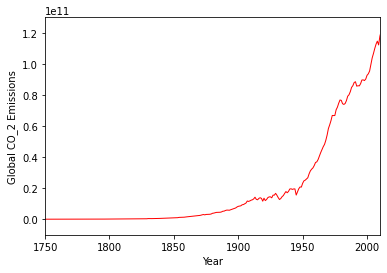

In [11]:
x=sumdf.index  #Year
y=sumdf.values #CO_2 emissions

ax = plt.gca()
ax.set_xlabel("Year")
ax.set_ylabel("Global CO_2 Emissions")
ax.axis ([1750, 2010, -0.1e11, 1.3e11]) #xmin, xmax, ymin, ymax
ax.plot(x,y,
        color='r',
        linewidth=1.0
       )
plt.show()

2. Now consider the contribution of individual countries in this zero-filled CSV dataset and make a stacked plot of the countries over the years.

In [12]:
url_3 ="https://www.cdslab.org/recipes/programming/stat-crosscorr/annual-co-emissions-by-region.csv"

In [13]:
fetchDatafromWeb(filePath="./annual-co-emissions-by-region.csv", url=url_3)

'./annual-co-emissions-by-region.csv'

In [14]:
edf=pd.read_csv("./annual-co-emissions-by-region.csv")
edf

,Entity,Code,Year,Annual CO2 emissions (zero filled)
0,Afghanistan,AFG,1750,0
1,Afghanistan,AFG,1751,0
2,Afghanistan,AFG,1752,0
3,Afghanistan,AFG,1753,0
4,Afghanistan,AFG,1754,0
...,...,...,...,...
64255,Zimbabwe,ZWE,2015,12170460
64256,Zimbabwe,ZWE,2016,10814761
64257,Zimbabwe,ZWE,2017,10246841
64258,Zimbabwe,ZWE,2018,11340575


In [17]:
""" countries from plot provided in Assignment """

regions=["United States",'North America (excl. USA)','EU-28', 'Europe (excl. EU-28)', 
           'Africa', 'Asia (excl. China & India)', 'China', 'India', 'South America', 
           'Oceania', 'International transport'] 

In [18]:
""" creating dict of regions: time series of Co2 emmisions """
y_vals = {}
for r in regions:
        subdf=edf.loc[edf['Entity'] == r]
        y_vals[r]= subdf.set_index('Year')["Annual CO2 emissions (zero filled)"]

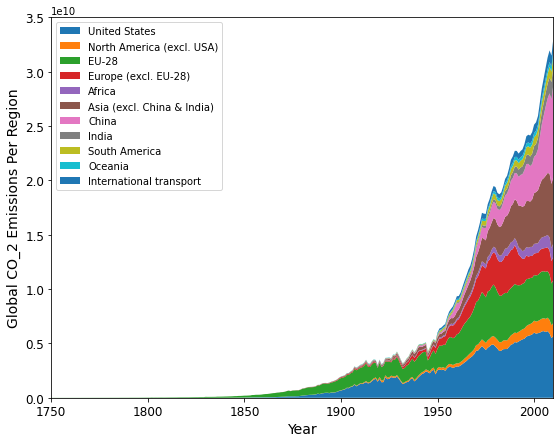

In [19]:
#y.values() corresponds to the y values for each region in lst
x=y_vals["United States"].index #years
fig, ax =plt.subplots(figsize=(9, 7))

ax.set_xlabel("Year", fontsize=14)
plt.xticks(fontsize=12)
ax.set_ylabel("Global CO_2 Emissions Per Region", fontsize=14)
plt.yticks(fontsize=12)
ax.axis ([1750, 2010, 0.0e10, 3.5e10]) #xmin, xmax, ymin, ymax

ax.stackplot(x,y_vals.values(),labels=y_vals.keys())
ax.legend(loc='upper left')
plt.show()

3a. Generating the average annual temperature anomaly data 

In [20]:
""" Replacing real number values in the "year" column to whole year values """
import math
for year in ndf["year"].values:
    whole_yr=math.trunc(year)
    ndf["year"].replace({year:whole_yr}, inplace=True)
ndf

/usr/local/lib/python3.8/dist-packages/pandas/core/series.py:4479: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,year,anomaly
0,1743.0,-1.131
5,1744.0,1.926
6,1744.0,-1.115
7,1744.0,-0.235
8,1744.0,-0.430
...,...,...
3234,2013.0,0.813
3235,2013.0,1.088
3236,2013.0,0.671
3237,2013.0,0.919


In [21]:
""" Finding annual avg temp anomaly data for each year subset from previous df """
meandf =ndf.groupby('year')['anomaly'].mean().to_frame().reset_index()
#meandf =ndf.groupby('year')['anomaly'].mean().to_frame()
meandf

,year,anomaly
0,1743.0,-1.131000
1,1744.0,-0.572000
2,1745.0,-1.057500
3,1750.0,-0.201000
4,1751.0,-0.263250
...,...,...
262,2009.0,0.824083
263,2010.0,1.018500
264,2011.0,0.835667
265,2012.0,0.818167


In [85]:
""" Numpy Array of Mean Dataframe """
mdata=meandf.to_numpy()

3b.  Extract the subset of CSV data from Step 2 in the above corresponding to the regional keyword "World" in the Entity column of data. Then, match the temperature anomaly data with the global CO2 emission data to generate a unified dataset. 

In [22]:
""" Extracting "World" subset """
world_subset=edf.loc[edf['Entity'] == "World"].reset_index(drop=True)
world_subset

,Entity,Code,Year,Annual CO2 emissions (zero filled)
0,World,OWID_WRL,1750,9350528
1,World,OWID_WRL,1751,9350528
2,World,OWID_WRL,1752,9354192
3,World,OWID_WRL,1753,9354192
4,World,OWID_WRL,1754,9357856
...,...,...,...,...
265,World,OWID_WRL,2015,35209446562
266,World,OWID_WRL,2016,35220412420
267,World,OWID_WRL,2017,35696348890
268,World,OWID_WRL,2018,36419711706


In [23]:
""" Creating Unified Dataset """
#selecting the years that intersect on both datasets (1750-2013)
udf=meandf.loc[meandf['year'].isin(world_subset['Year'])].rename(columns={'year':'Year'})
#merging both datasets based on same values under "year"
udf=udf.merge(world_subset, on='Year', how='left')
udf

,Year,anomaly,Entity,Code,Annual CO2 emissions (zero filled)
0,1750.0,-0.201000,World,OWID_WRL,9350528
1,1751.0,-0.263250,World,OWID_WRL,9350528
2,1752.0,-0.384167,World,OWID_WRL,9354192
3,1753.0,-0.350167,World,OWID_WRL,9354192
4,1754.0,-0.050500,World,OWID_WRL,9357856
...,...,...,...,...,...
259,2009.0,0.824083,World,OWID_WRL,31464200426
260,2010.0,1.018500,World,OWID_WRL,33131911067
261,2011.0,0.835667,World,OWID_WRL,34209582571
262,2012.0,0.818167,World,OWID_WRL,34760008139


In [100]:
x=udf["Year"]
anomalies=udf["anomaly"]
emissions=udf["Annual CO2 emissions (zero filled)"]

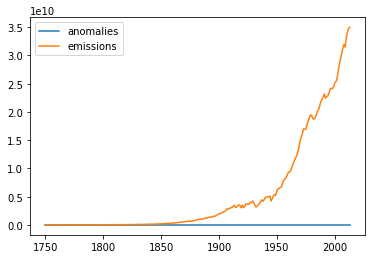

In [78]:
plt.plot(x, anomalies, label="anomalies")
plt.plot(x, emissions, label="emissions")
plt.legend()

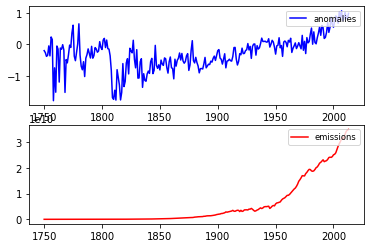

In [80]:
fig, axs = plt.subplots(nrows=2)
#fig.subplots_adjust(hspace=0.4)
ax = axs[0]
ax.plot(x, anomalies, 'b', label='anomalies')
ax.legend(loc='upper right', fontsize='small', ncol=2)
ax = axs[1]
ax.plot(x, emissions, 'r', label='emissions')
ax.legend(loc='upper right', fontsize='small', ncol=2)


3c. Write a function that computes the cross-correlation between the temperature anomaly and the global CO2 emissions. Use the definition of the correlation matrix that we have seen before to compute the cross-correlation.

In [110]:
import math
def getPearsonCor(data1,data2):
    """""
        Generate and return the pearson correlation coefficient. 
        Input two columns of data to your function to compute the Pearson corrcoeff. 
        The columns correspond to the data attributes.
        Make sure rows of data with "nan" are removed.
        
        Parameters:
            data1,data2 = data attribute 1, data attribute 2
    """""
    x_mean, y_mean = data1.mean(), data2.mean()
    #x_std, y_std = data1.std(), data2.std()
    x_var = sum ((x_i - x_mean)**2 for x_i in data1)
    y_var = sum ((y_i - y_mean)**2 for y_i in data2)
    
    #cov(x,y)- numerator
    #sqrt(varx*vary)-denominator
    cov = sum((x_i-x_mean)*(y_i-y_mean) for x_i,y_i in zip(data1,data2))
    den = math.sqrt(x_var*y_var)
    
        
    return np.true_divide(cov,den)

In [116]:
def getCrossCor(data1, data2,t=None):
    """""
        Generate and return cross correlation of data1 and data2 given number of lags "t".
        Data1 and Data2 each represent a 1-D input with same length.
        
        Recall that the autocorrelation of a time-series is defined as 
        the correlation of a univariate dataset with itself, with some positive lag τ.
    """""
    #i ~ lag
    if t is None:
        #ccorr= [data1.corr(data2.shift(i))  for i in range(len(data1)) ]
        ccorr= [getPearsonCor(data1[:-i], data2[i:])  for i in range(len(data1)) ]
             
    else:
        #ccorr= [data1.corr(data2.shift(i))  for i in range(t) ]
        ccorr= [getPearsonCor(data1[:-i], data2[i:]) for i in range(t) ]
        

    return ccorr

In [117]:
gen_ccorr=getCrossCor(anomalies,emissions)

<ipython-input-110-9fdef82c0cb6>:23: RuntimeWarning: invalid value encountered in true_divide
  return np.true_divide(cov,den)


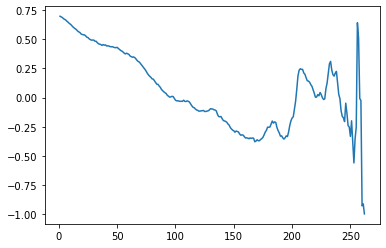

In [118]:
#using PearsonCor
xgen_ccorr=[i for i in range(len(gen_ccorr))]
plt.plot(xgen_ccorr,gen_ccorr)

In [112]:
getPearsonCor(anomalies,emissions)

0.7065475196707427

Now, use an external library in the language of your choice to compute the autocorrelation using Fast-Fourier Transform (FFT). Within Python, you can use correlate in SciPy package from scipy.signal import correlate to compute the autocorrelation. To do so, you will have to first normalize the input data (the anomaly data) to its mean. Then you pass the data in syntax like the following:

In [101]:
import numpy as np
from scipy.signal import correlate

anomalies = anomalies - np.mean(anomalies)
emissions = emissions - np.mean(emissions)

nlag = len(anomalies) - 1
acf = np.zeros(nlag)

acf = correlate ( anomalies
                , emissions
                , mode = "full"
                )[nlag:2*nlag]
acf = acf / acf[0]
xacf=[i for i in range(len(acf))]

Text(0, 0.5, 'Global Temp Anomaly vs. Emissons Autocorrelation')

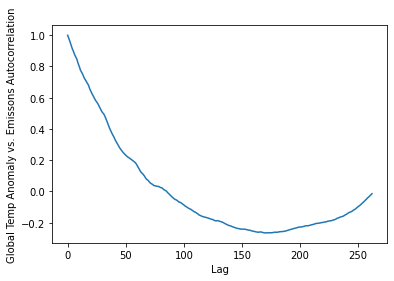

In [102]:
plt.plot(xacf,acf)
plt.xlabel("Lag")
plt.ylabel("Global Temp Anomaly vs. Emissons Autocorrelation")